In [1]:
import pandas as pd

In [2]:
# Loading the diabetes dataset
data = pd.read_csv('diabetes.csv')

In [3]:
import matplotlib.pyplot as plt

# ensures that plots will automatically display inline without requiring an explicit call to plt.show()
%matplotlib inline

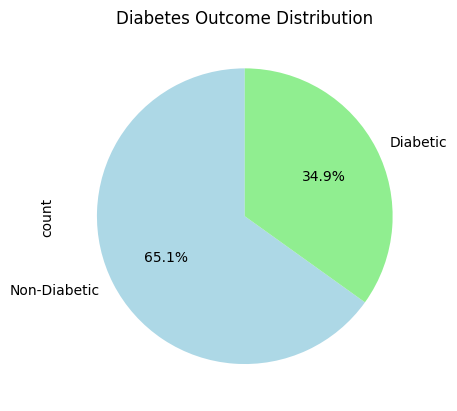

In [4]:
# a) Pie chart for patient outcomes (diabetic vs non-diabetic)
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], labels=['Non-Diabetic', 'Diabetic'])
plt.title('Diabetes Outcome Distribution')
plt.show()

In [5]:
# copy the dataset into an instance
data2=data.copy()

In [6]:
# b) Handling missing values
# Mean for BMI
data2.fillna({'BMI': data2['BMI'].mean()}, inplace=True)

In [7]:
# Median for BloodPressure
data2.fillna({'BloodPressure': data2['BloodPressure'].median()}, inplace=True)

In [8]:
# Mode for Insulin
data2.fillna({'Insulin': data2['Insulin'].mode()[0]}, inplace=True)

In [9]:
# store the column names that have NULL values into a list variable
columnwithnull=data.columns[data2.isnull().any()].tolist()

In [10]:
# show the 'columnwithnull' list
columnwithnull

['Glucose', 'SkinThickness']

In [11]:
# replace the missing values in all columnwithnull with 'mean' value
for column in columnwithnull:
    data2.fillna({column: data2[column].mean()}, inplace=True)

In [12]:
# Check again if there are still any missing values in the dataset
print(data2.isnull().sum())  # This should print 0 for all columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


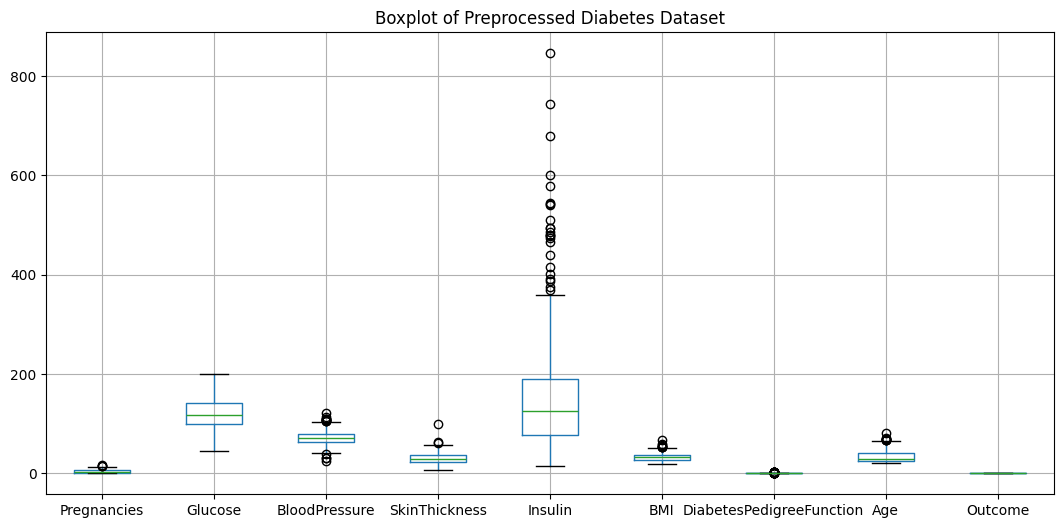

In [13]:
# c) Boxplot of the pre-processed dataset
boxplot=data.boxplot(figsize=(13, 6))
plt.title('Boxplot of Preprocessed Diabetes Dataset')
plt.show()

In [14]:
# d) Comparing ML Models (Logistic Regression, SVM, and Decision Tree)
# store all rows and all columns into X except the last column
X = data2.iloc[:,:-1]

In [15]:
# store the last column into Y
Y = data2.iloc[:,8]

In [16]:
# same as before
# X = data2.drop(columns=['Outcome'])
# Y = data2['Outcome']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# split the data with 70:30 ratio as train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.3)

In [19]:
# import 'LogisticRegression' model
from sklearn.linear_model import LogisticRegression

In [20]:
# create the 'LogisticRegression' model 
model=LogisticRegression(solver='lbfgs', max_iter=200)

In [21]:
# fit 'X-train' and 'Y_train' into the model
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [22]:
# predict the model using the 'X_test' dataset
Y_predictions = model.predict(X_test)

In [23]:
# import 'accuracy_score' and 'confusion_matrix'
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
# calculate the accuracy of the model
accuracy_LR=accuracy_score(Y_test, Y_predictions)

In [25]:
# show the accuracy score
accuracy_LR

0.7402597402597403

In [26]:
# calculate and show the confusion_matrix of the model
confusion_matrix(Y_test, Y_predictions)

array([[124,  27],
       [ 33,  47]])

In [27]:
# import Support Vector Machine model
from sklearn.svm import SVC

In [28]:
# create the Support Vector Machine model
smodel = SVC(C=1000.0, random_state=1, kernel='linear')

In [29]:
# fit 'X-train' and 'Y_train' into the model
smodel.fit(X_train, Y_train)

SVC(C=1000.0, kernel='linear', random_state=1)

In [30]:
# predict the model using the 'X_test' dataset
Y_predictions = smodel.predict(X_test)

In [31]:
# calculate the accuracy of the model
accuracy_SVM=accuracy_score(Y_test, Y_predictions)

In [32]:
# show the accuracy score
accuracy_SVM

0.7489177489177489

In [33]:
# calculate and show the confusion_matrix of the model
confusion_matrix(Y_test, Y_predictions)

array([[124,  27],
       [ 31,  49]])

In [34]:
# import Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

In [35]:
# create the Decision Tree Classifier model
DTmodel = DecisionTreeClassifier()

In [36]:
# predict the model using the 'X_test' dataset
Y_predictions = smodel.predict(X_test)

In [37]:
# calculate the accuracy of the model
accuracy_DT=accuracy_score(Y_test, Y_predictions)

In [38]:
# show the accuracy score
accuracy_DT

0.7489177489177489

In [39]:
# calculate and show the confusion_matrix of the model
confusion_matrix(Y_test, Y_predictions)

array([[124,  27],
       [ 31,  49]])

In [40]:
# show the accuracy score of 'Logistic Regression', 'Support Vector Machine' and 'Decison Tree Classifier'
print(accuracy_LR, accuracy_SVM, accuracy_DT)

0.7402597402597403 0.7489177489177489 0.7489177489177489


In [41]:
import matplotlib.pyplot as plt

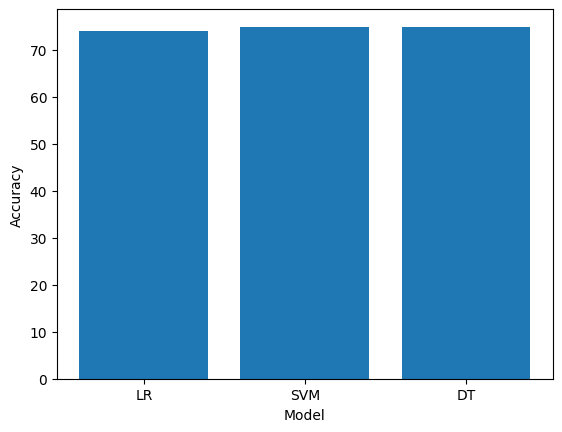

In [42]:
# plot the model accuracy (percentage) using the bar chart
fig = plt.figure()
Model = ['LR', 'SVM', 'DT']
Results = [accuracy_LR*100, accuracy_SVM*100, accuracy_DT*100]
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(Model, Results)
plt.show()